In [131]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics

from sklearn.datasets import load_boston

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline


In [ ]:
#importing boston dataset
boston = load_boston()

In [133]:
#initialising the data Frame
df=pd.DataFrame(boston.data)

In [134]:
#seeing the dataset 
df.head(8)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15


In [135]:
#adding the names of features with respective data
df.columns=boston.feature_names
#Adding target variable to dataframe

In [136]:
#cheking columns before adding features for target value i.e price
df.shape

(506, 13)

In [137]:
df['PRICE'] = boston.target 
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* CRIM: per capita crime rate by
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to ﬁve Boston employment centers
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per $10,000 

* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population
* PRICE: Median value of owner-occupied homes in $1000s We can see that the input attributes have a mixture of units.


In [138]:
#checking columns after adding target values
df.shape

(506, 14)

In [139]:
# all datas are properly associated with their types
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [140]:
#Statistics of dataset described.
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [141]:
#So no data is missing since all sums are 0.
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

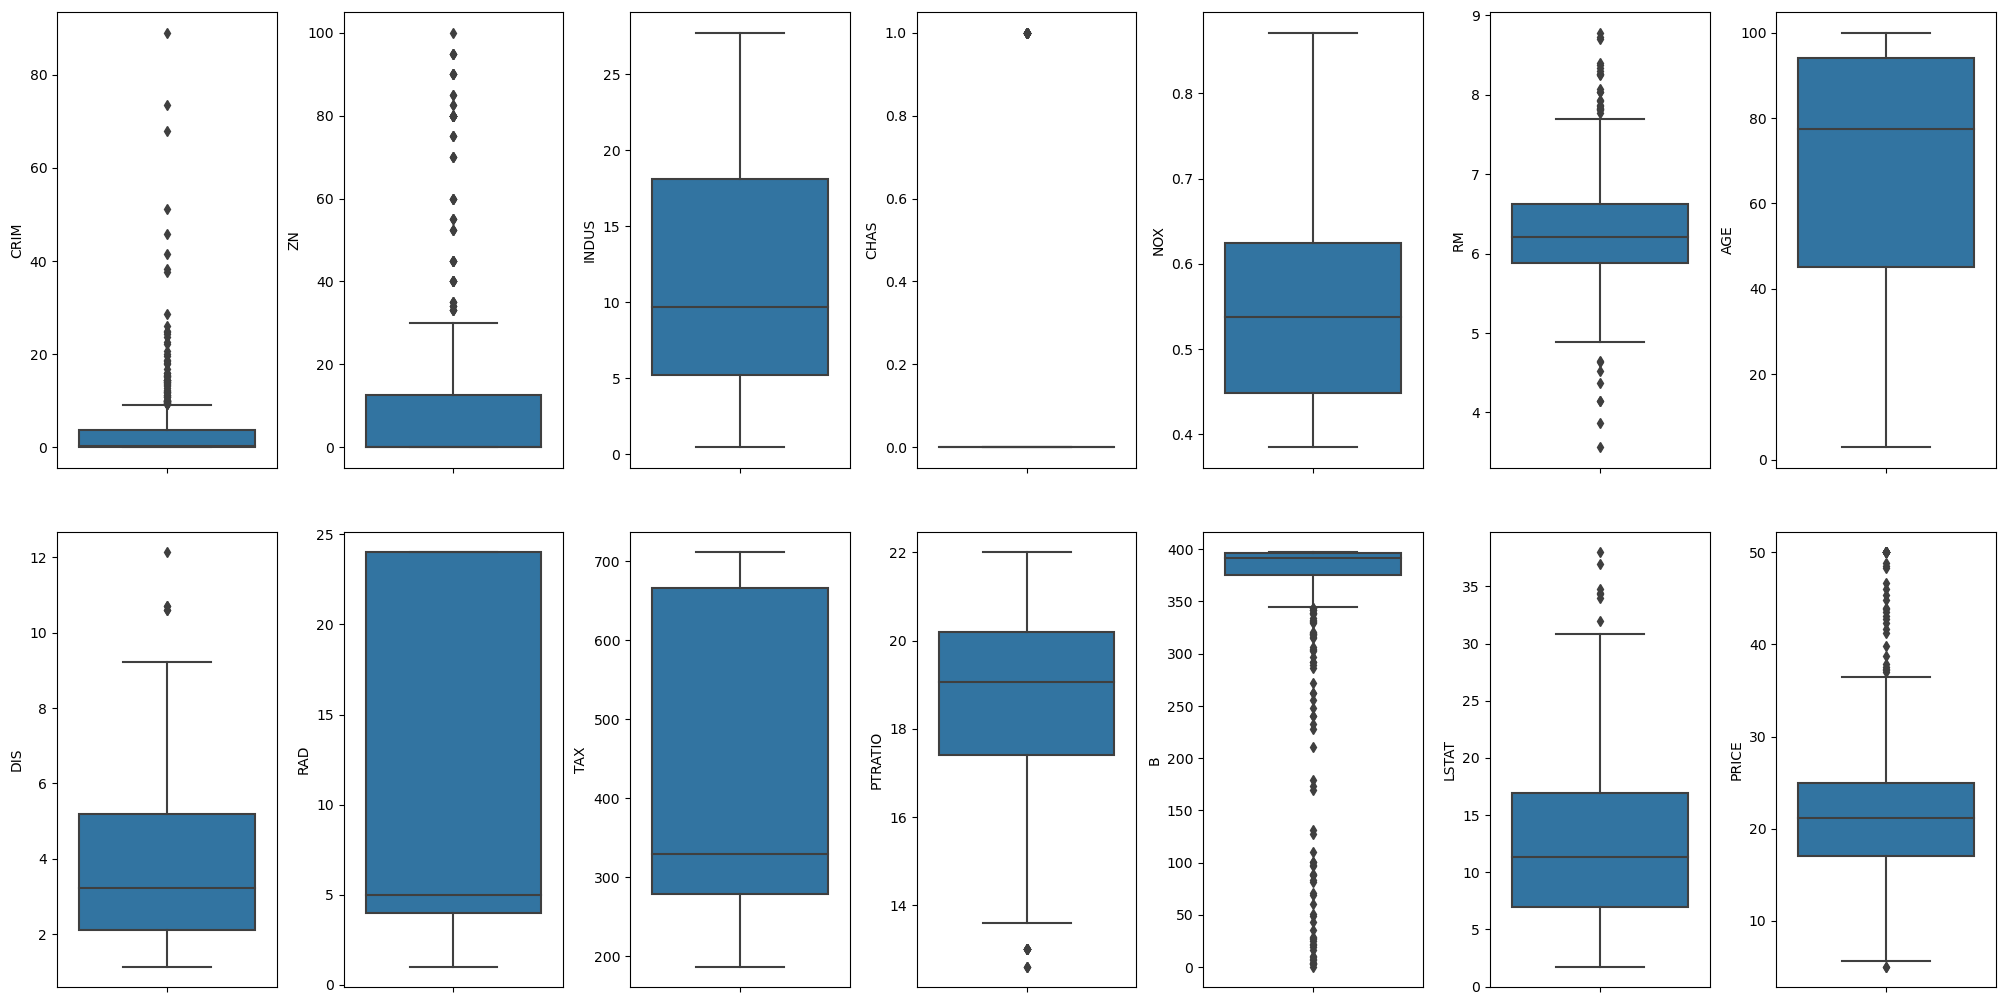

In [142]:
#checking outliers using boxplot
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
count = 0
axs = axs.flatten()
for tar,var in df.items():
    sns.boxplot(y=tar, data=df, ax=axs[count])
    count= count+1
plt.tight_layout(pad=0.5, w_pad=0.78, h_pad=4.0)

larage number of outliers in crime , N , rm ,b

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'PRICE'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

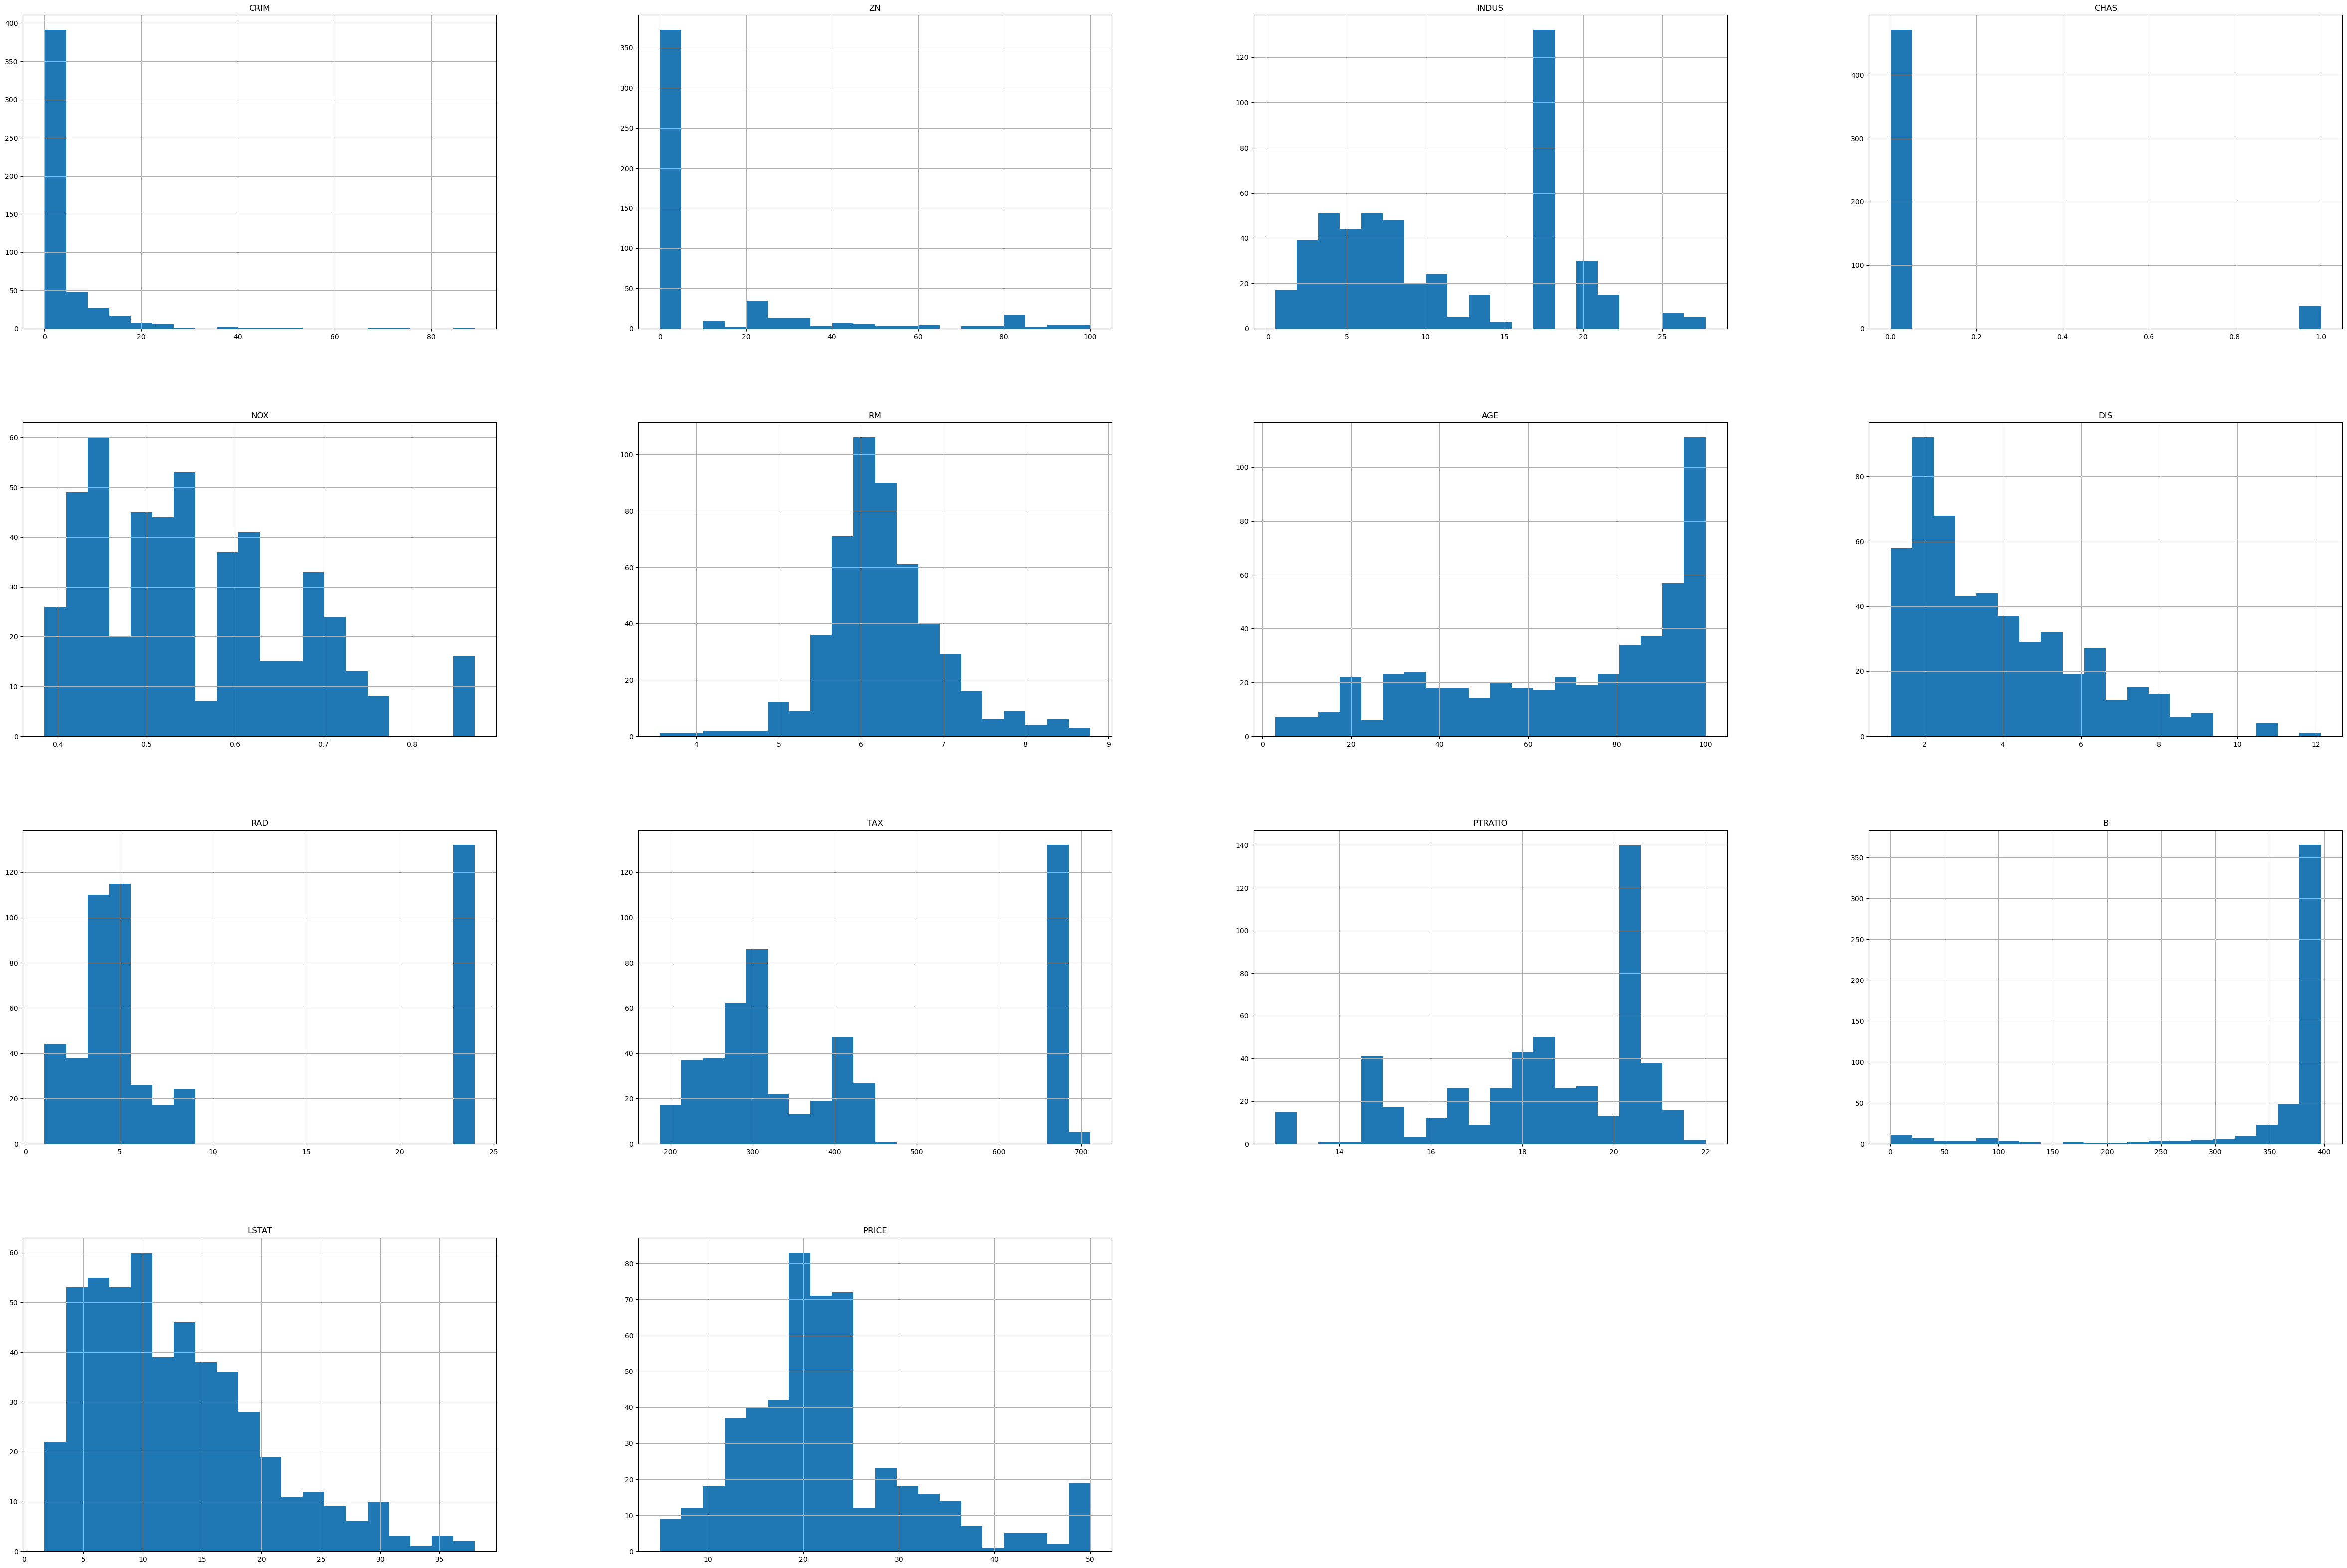

In [143]:
#Checking the skewness in data
df.hist(bins=20, figsize=(60, 40))

In [144]:
#outliers in percentage
for tar,var in df.items():
    q1=var.quantile(0.25)
    q3=var.quantile(0.75)
    iqr=q3-q1
    var_col=var[(var<=q1-1.5*iqr) | (var>=q3+1.5*iqr)]
    perc=np.shape(var_col)[0]*100.0/np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (tar, perc)) 

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column PRICE outliers = 7.91%


In [145]:
#feature selection
#checking the correlation between two features.
corr=df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

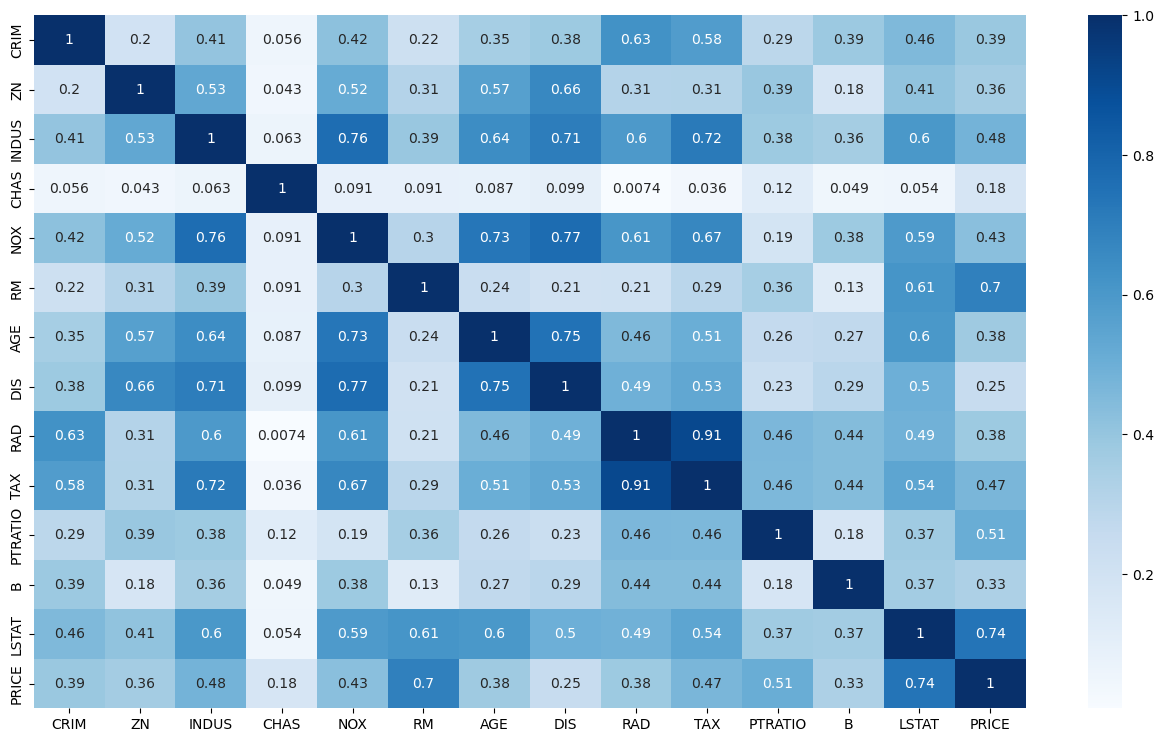

In [146]:
#using a heatmap to see correlation between features more clearly.
plt.figure(figsize=(16,9))
sns.heatmap(corr.abs(), annot=True,cmap='Blues')

From the correlation matrix RM,LSTAT,TAX,NOX,INDUS,PTRATIO is correlated with PRICE. TAX and RAD is highly correlated with each other(0.91).So, here we get our predictors.

========================================================================================================

Model build
* 1-Split Data in Train/Test for both X and y
* 2-Fit/Train Scaler on Training X Data
* 3-Scale X Test Data
* 4-Create Model
* 5-Fit/Train Model on X Train Data
* 6-Evaluate Model on X Test Data (by creating predictions and comparing to Y_test)
* 7-Adjust Parameters as Necessary and repeat steps 5 and 6


In [147]:
# Spliting target variable and independent variables
X = df.drop(['PRICE'], axis = 1)
y = df['PRICE']

In [148]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [149]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [150]:
#splitting the data to train and test. checking the validation of the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 10)

========================================================================================================

## 1 Random Forest

In [151]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [152]:
#Predicting the model
y_pred=rfr.predict(X_train)

In [153]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.974672946345143
Adjusted R^2: 0.9735336671149938
MAE: 0.8998382838283825
MSE: 2.012974676567658
RMSE: 1.4187933875542478


Adjusted R^2 value is very good.

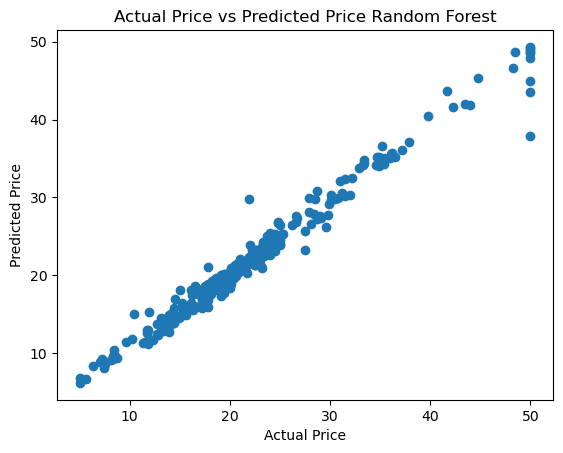

In [154]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price Random Forest")
plt.show()

Actual price v/s predicted price is almost a straight line. It can be a good model.

In [155]:
#Check for Multicollinearity using Variance Inflation Factor
R_square=rfr.score(X_test,y_test)
VIF_RFR = 1/(1-R_square)
VIF_RFR

7.415018307062564

Multicollinearity: occurs when the independent variables are too highly correlated with each other. The variance inflation factor (VIF)
If VIF=1 no correlation, If VIF >1 & VIF <5 moderate correlation, VIF > 5 critical level of multicollinearity.

In [156]:
#predicting the data using above model on test data
y_tpred= rfr.predict(X_test)
#Model Evaluation
tpred_rfr = metrics.r2_score(y_test, y_tpred)
print('R^2:',tpred_rfr)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_tpred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_tpred))
print('MSE:',metrics.mean_squared_error(y_test, y_tpred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_tpred)))
score = metrics.r2_score(y_test, y_tpred)
print("Accuracy: {} %".format(round((score*100),2)))

R^2: 0.865138566273325
Adjusted R^2: 0.8558623830011198
MAE: 2.332482758620688
MSE: 12.254896019704422
RMSE: 3.500699361513985
Accuracy: 86.51 %


========================================================================================================

## 2 Linear Regression

In [157]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [158]:
# Value of y intercept
lm.intercept_

31.4786961821257

In [159]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.145532
1,ZN,0.060672
2,INDUS,-0.000592
3,CHAS,2.355468
4,NOX,-16.023913
5,RM,3.955193
6,AGE,0.000107
7,DIS,-1.562768
8,RAD,0.268553
9,TAX,-0.011798


In [160]:
#predicting on training data
y_pred=lm.predict(X_train)
#Model Evaluation and error calculations
print('R^2 =',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(y_train, y_pred))
print('MSE =',metrics.mean_squared_error(y_train, y_pred))
print('RMSE =',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2 = 0.7588890959138562
Adjusted R^2 = 0.7480432766989086
MAE = 3.1532948788568436
MSE = 19.163308562607487
RMSE = 4.377591639544224


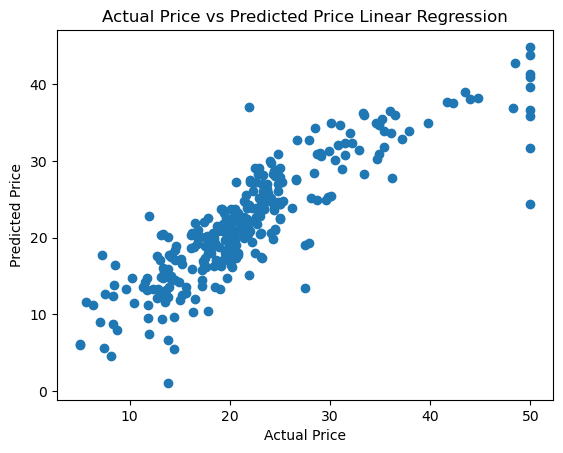

In [161]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price Linear Regression")
plt.show()

In [162]:
#Check for Multicollinearity
#Variance Inflation Factor
R_square = lm.score(X_test,y_test)
VIF_LR = 1/(1- R_square)
VIF_LR

3.3970163982366244

In [163]:
#predicting the data using above model
y_tpred= lm.predict(X_test)
#Model Evaluation
tpred_linreg = metrics.r2_score(y_test, y_tpred)
print('R^2:', tpred_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_tpred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_tpred))
print('MSE:',metrics.mean_squared_error(y_test, y_tpred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_tpred)))
score = metrics.r2_score(y_test, y_tpred)
print("Accuracy: {} %".format(round((score*100),2)))

R^2: 0.7056240292160216
Adjusted R^2: 0.6853759465695046
MAE: 3.4003389582806554
MSE: 26.750026400940182
RMSE: 5.172042768668892
Accuracy: 70.56 %


========================================================================================================

## 3 XGBOOST Regressor

In [164]:
#importing XGBOOST regression library
from xgboost import XGBRegressor
xgbr= XGBRegressor()
#Training the model
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [165]:
#predicting the model
y_pred=xgbr.predict(X_train)

In [166]:
# Model Evaluation and error calculations
print('R^2 =',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(y_train, y_pred))
print('MSE =',metrics.mean_squared_error(y_train, y_pred))
print('RMSE =',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2 = 0.9999988630269813
Adjusted R^2 = 0.9999988118828662
MAE = 0.006503930107595162
MSE = 9.036573798904984e-05
RMSE = 0.009506089521409413


R^2 is very good for train

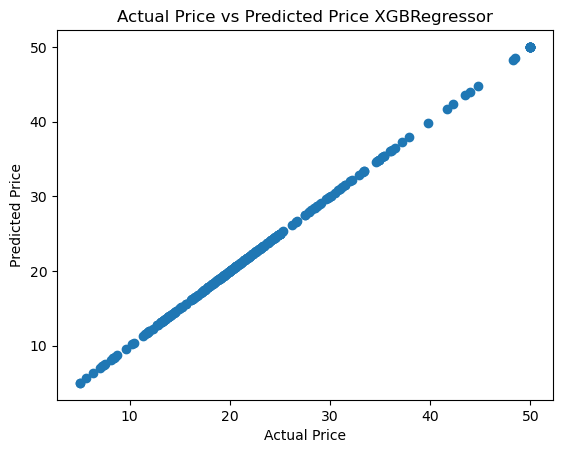

In [167]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price XGBRegressor")
plt.show()

In [168]:
#check for Multicollinearity using Variance Inflation Factor
R_square=xgbr.score(X_test,y_test)
VIF_XGBR = 1/(1-R_square)
VIF_XGBR

9.037278646195631

In [169]:
#predicting the data using above model
y_tpred= xgbr.predict(X_test)
#Model Evaluation
tpred_xgbr = metrics.r2_score(y_test, y_tpred)
print('R^2:',tpred_xgbr)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_tpred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_tpred))
print('MSE:',metrics.mean_squared_error(y_test, y_tpred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_tpred)))
score = metrics.r2_score(y_test, y_tpred)
print("Accuracy: {} %".format(round((score*100),2)))

R^2: 0.8893472206457899
Adjusted R^2: 0.8817361829124315
MAE: 2.2171487596821904
MSE: 10.055048858708098
RMSE: 3.170969703215106
Accuracy: 88.93 %


========================================================================================================

## 4 LASSO

In [170]:
from sklearn import linear_model
clf = linear_model.Lasso()
clf.fit(X_train,y_train)

Lasso()

In [171]:
#Predicting the model
y_pred=clf.predict(X_train)

In [172]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7001767761944973
Adjusted R^2: 0.6866899183762567
MAE: 3.426874628669839
MSE: 23.82971841857385
RMSE: 4.881569257787279


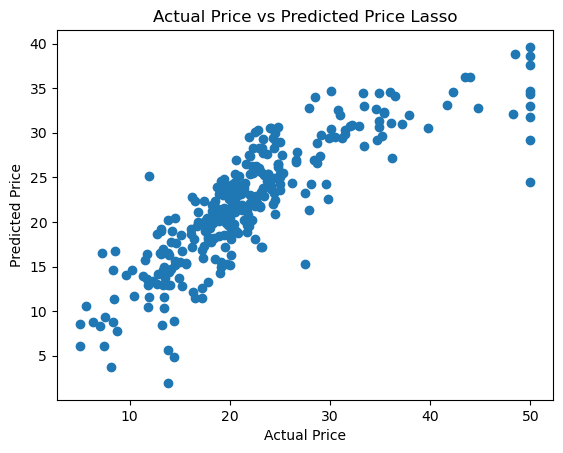

In [173]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price Lasso")
plt.show()

In [174]:
#Check for Multicollinearity using Variance Inflation Factor
R_square=clf.score(X_test,y_test)
VIF_CLF = 1/(1-R_square)
VIF_CLF

2.860887101134165

In [175]:
#predicting the data using above model
y_tpred= clf.predict(X_test)
#Model Evaluation
tpred_lasso = metrics.r2_score(y_test, y_tpred)
print('R^2:', tpred_lasso)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_tpred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_tpred))
print('MSE:',metrics.mean_squared_error(y_test, y_tpred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_tpred)))
score = metrics.r2_score(y_test, y_tpred)
print("Accuracy: {} %".format(round((score*100),2)))

R^2: 0.6504580695954196
Adjusted R^2: 0.6264155029538347
MAE: 3.75179843808934
MSE: 31.762972506406136
RMSE: 5.635864841034261
Accuracy: 65.05 %


========================================================================================================

## 5 Ridge 

In [176]:
from sklearn.linear_model import Ridge
rid = linear_model.Ridge()
rid.fit(X_train, y_train)

Ridge()

In [177]:
#predicting the model
y_pred=rid.predict(X_train)

In [178]:
# Model Evaluation and error calculations
print('R^2 =',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(y_train, y_pred))
print('MSE =',metrics.mean_squared_error(y_train, y_pred))
print('RMSE =',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2 = 0.7562149048421075
Adjusted R^2 = 0.7452487932952128
MAE = 3.1292151900071326
MSE = 19.37585120499657
RMSE = 4.401800904743031


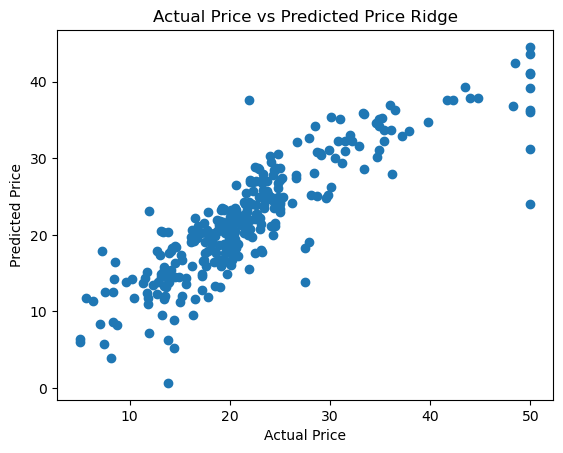

In [179]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price Ridge")
plt.show()

In [180]:
#check for Multicollinearity using Variance Inflation Factor
R_square=rid.score(X_test,y_test)
VIF_RID = 1/(1-R_square)
VIF_RID

3.341890256392977

In [181]:
#predicting the data using above model
y_tpred= rid.predict(X_test)
#Model Evaluation
tpred_rid = metrics.r2_score(y_test, y_tpred)
print('R^2:',tpred_rid)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_tpred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_tpred))
print('MSE:',metrics.mean_squared_error(y_test, y_tpred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_tpred)))
score = metrics.r2_score(y_test, y_tpred)
print("Accuracy: {} %".format(round((score*100),2)))

R^2: 0.7007681511722242
Adjusted R^2: 0.6801860663322186
MAE: 3.4318365743137385
MSE: 27.19128139035182
RMSE: 5.214525998626511
Accuracy: 70.08 %


========================================================================================================

## The Best Model is XGBRegressor